**[Source : Saudi Arabia Used Cars](https://drive.google.com/file/d/1Tr4YT5dmgwTrXLvIqZ4diBf5z8K6JjrR/view)*

### **Contents**

1. Business Problem
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

## Business Problem Understanding

**Context**

Berdasarkan Analisis Pasar Mobil Bekas Arab Saudi yang didapat dari [Mordor Intelligence](https://www.mordorintelligence.com/industry-reports/saudi-arabia-used-car-market#:~:text=Saudi%20Arabia%20Used%20Car%20Market%20Analysis,7.36%25%20over%20the%20forecast%20period). Pasar Mobil Bekas Arab Saudi memiliki nilai sebesar 4,91 miliar dolar AS pada tahun 2021 dan diperkirakan akan mencapai valuasi bersih sebesar 8,69 miliar dolar AS pada akhir tahun 2027, dengan pertumbuhan CAGR yang solid sebesar 7,36% selama periode perkiraan. Industri mobil bekas merupakan sektor yang sedang mengalami pertumbuhan pesat dan diprediksi akan terus menarik minat masyarakat dalam waktu dekat. Bisnis mobil bekas memiliki persaingan yang ketat, namun juga menawarkan peluang untuk mendapatkan keuntungan yang signifikan dengan modal yang relatif rendah. Keberhasilan dalam bisnis ini membutuhkan keterampilan dan pengetahuan yang mendalam mengenai mobil. Para pemilik bisnis ini memperoleh mobil bekas yang berkualitas, melakukan perbaikan yang diperlukan, dan menjualnya dengan harga yang lebih tinggi.

Selama dekade terakhir, industri mobil bekas di Arab Saudi telah mengalami peningkatan yang signifikan seiring dengan meningkatnya penggunaan mobil. Dan juga berdasarkan survei demografi terbaru yang dilakukan oleh Otoritas Umum Statistik di Arab Saudi, sebagian besar keluarga memiliki minimal 2 mobil. Mobil bekas menjadi pilihan yang menarik karena harganya lebih terjangkau dibandingkan mobil baru. Namun, proses pembelian atau penjualan mobil bekas bisa menjadi tugas yang rumit dikarenakan terdapat banyak jenis mobil (berdasarkan merek, jenis transmisi, ukuran mesin, jarak tempuh, opsi, dan tahun), terutama saat menentukan harga pasar yang terbaik. Banyak orang yang tidak memiliki pengetahuan tentang tren pasar dan membutuhkan metode yang dapat diandalkan dan cerdas untuk memberikan perkiraan harga berdasarkan data pasar yang tersedia.

**Problem Statement**

Salah satu tantangan utama dalam industri mobil bekas adalah mengestimasi harga mobil bekas untuk pembeli atau penjual yang ingin mengikuti tren pasar. Penentuan harga mobil bekas berdasarkan merek, jenis mesin, tahun, dan faktor lainnya membutuhkan keahlian profesional yang memahami kondisi mobil dan skema harga yang sesuai berdasarkan pengalaman sebelumnya. Dalam situasi ini, diperlukan sebuah model yang dapat memberikan perkiraan harga mobil bekas berdasarkan data historis.

Model tersebut akan memberikan kemudahan bagi pembeli dengan memberikan informasi tentang kualitas mobil, baik itu dalam kondisi yang sangat baik, baik, atau buruk. Di sisi lain, model ini juga dapat membantu para pelaku bisnis mobil bekas dalam menentukan harga jual berdasarkan data pasar, serta memberi tahu apakah harga tersebut dapat dinegosiasikan.

**Goal**

Dalam menghadapi tantangan tersebut, industri mobil bekas memerlukan alat untuk prediksi harga mobil bekas yang dapat diandalkan bagi pengguna yang ingin membeli atau menjual mobil berdasarkan rincian seperti model mobil dan jarak tempuh. Sehingga jika seseorang ingin menjual mobilnya, kita dapat memberikan perkiraan harga berdasarkan tren pasar dan sesuai dengan spesifikasi mobil untuk membantu pengguna mengatasi kesulitan dalam menentukan harga.

**Analytic Approach**

Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu fitur dengan yang lainnya.

Selanjutnya, kita akan membangun suatu model regresi yang akan membantu pengguna untuk mendapatkan *tool* prediksi harga mobil berkas yang bertujuan untuk menghindari harga mobil bekas yang *overprice* atau *underprice*

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan. 

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

### **Data Understanding**

### Attribute Information

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| Type | Text | Brand Name of Car |
| Region | Text | The region in which the used car was offered for sale |
| Make | Text | Name of the car company |
| Gear_Type | Text | Automatic / Manual |
| Origin | Text | Country of importer (Gulf / Saudi / Other) |
| Options | Text | Full Options / Semi-Full / Standard |
| Year | Int | Year of Manufacturing |
| Engine_Size | Float | The engine size of used car |
| Mileage | Int | The average distance that a vehicle can travel on (in km) |
| Negotiable | Bool| If True, the price is 0. This means the price is negotiable (not set) |
| Price | Int | Price of the used car (in SAR) |

Step 1: Reading & Understanding the Data

In [8]:
# Import library untuk mengeksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk mengabaikan warnings
import warnings
warnings.filterwarnings('ignore')


# Untuk mengubah notasi ilmiah menjadi format desimal
pd.options.display.float_format = '{:.1f}'.format

### Read the dataset

In [9]:
# Read dataset
df = pd.read_csv('data_saudi_used_cars.csv')
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


In [10]:
# Check datatype for each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


### Variable Description

- `Type` : Jenis mobil bekas

- `Region` : Wilayah tempat mobil bekas tersebut berada

- `Make` : Nama perusahaan pembuat mobil bekas

- `Gear_Type` : Jenis transmisi mobil bekas

- `Origin` : Asal mobil bekas

- `Options` : Pilihan-pilihan mobil bekas

- `Year` : Tahun pembuatan mobil bekas

- `Engine_Size` : Ukuran mesin mobil bekas

- `Mileage` : Jarak tempuh mobil bekas

- `Negotiable` : Status negosiasi mobil bekas

- `Price` : Harga mobil bekas (dalam Riyal)

Seperti yang dapat kita lihat, terdapat 11 kolom dalam dataset ini, di antaranya terdapat 10 fitur dan satu kolom target yaitu Harga yang merupakan variabel dependen kita. Tujuan kita adalah untuk memprediksi harga mobil menggunakan kumpulan fitur ini.

#### **Exploratory Data Analysis**

Exploratory data analysis digunakan untuk memeriksa data dan mendapatkan insight. Ini akan memberikan pemahaman dasar tentang data kita, distribusinya, nilai null, dan banyak lagi. Jadi, kita akan melakukan Exploratory Data Analysis (EDA) pada data untuk pemahaman yang lebih baik.

Seperti yang telah disebutkan sebelumnya, kolom `Price` adalah variabel target dan kolom-kolom lainnya adalah variabel independen. Variabel independen ini kemudian dibagi lagi menjadi variabel Kategorikal dan Numerikal.

Berikut ini kita pisahkan masing-masing tipe variabel itu sendiri:

- **Numerical Variabels** : Year, Engine_Size, Mileage, Price
- **Categorical Variabels** : Type, Region, Make, Gear_Type, Origin, Options, Negotiable

**Numerical Variabels**

Untuk Numerical Variabels, kita dapat memperoleh wawasan dan korelasi dengan menggunakan Pair Plot. Karena Pair Plot menampilkan grafik pasangan untuk semua variabel numerikal dalam daftar, dan kita dapat melihat korelasi antara variabel numerikal.

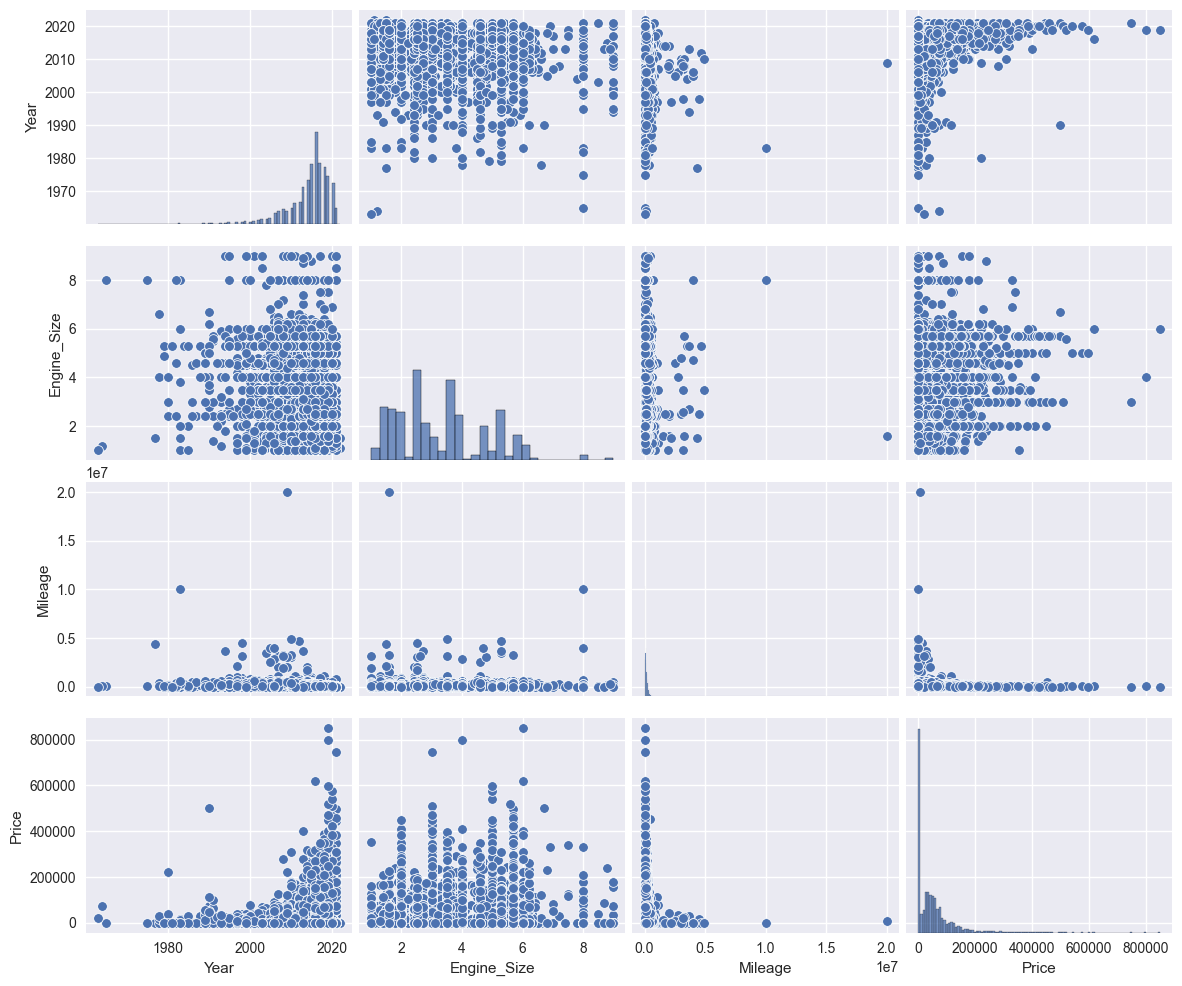

In [11]:
# Pairplot untuk semua variabel numerik
sns.pairplot(df[['Year','Engine_Size','Mileage','Price']], aspect=1.2)

**Insight** : 

Seperti yang dapat kita lihat dari grafik Pairplot di atas, terdapat korelasi tinggi dan korelasi rendah antara variabel-variabel satu sama lain.
- **Year** : Engine_Size (Korelasi Rendah), Mileage (Korelasi Tinggi), Price (Korelasi Tinggi)
- **Engine_Size** : Year (Korelasi Rendah), Mileage (Korelasi Rendah), Price (Korelasi Rendah)
- **Mileage** : Year (Korelasi Tinggi), Engine_Size (Korelasi Rendah), Price (Korelasi Rendah)
- **Price** : Year (Korelasi Tinggi), Engine_Size (Korelasi Rendah), Mileage (LKorelasi Rendah) 

**Categorical Variabels**

Untuk Variabel Kategorikal, kita akan menganalisis nilai pada setiap kategori untuk eksplorasi dan merangkum kategori itu sendiri. Kita akan membuat urutan peringkat dan menghitung nilainya, sehingga kita dapat melihat perusahaan mobil bekas mana yang paling banyak, tipe mobil bekas yang paling banyak, wilayah mana yang paling tinggi penggunaan mobil bekas, dari mana asal mobil bekas tersebut, dan sebagainya.

In [12]:
import plotly.graph_objects as go
import plotly.express as px

**1. Distribution of used car price**

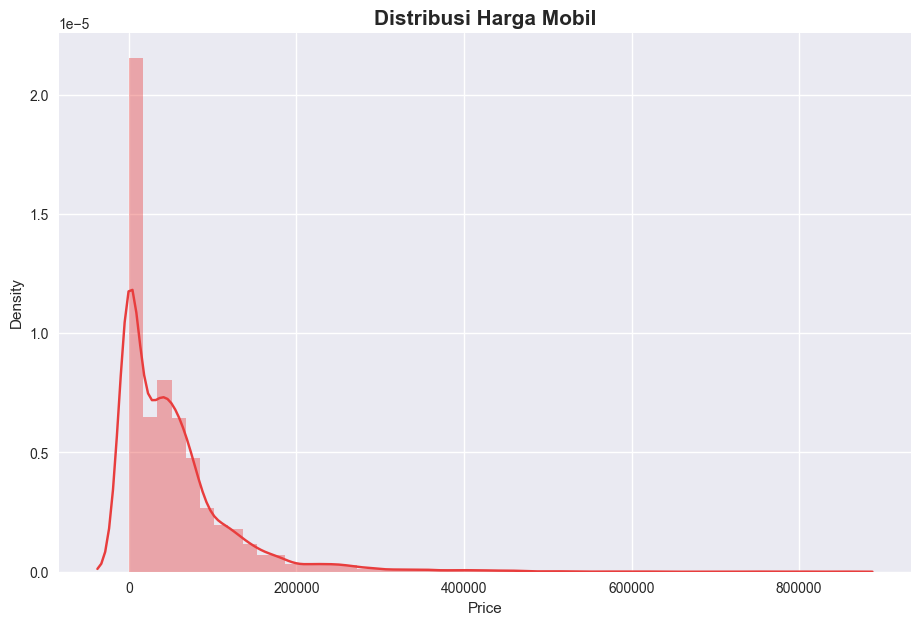

In [13]:
# Plot distribusi fitur 'price'
plt.style.use('seaborn')
plt.figure(figsize = (11,7))
sns.distplot(df['Price'], color="#e83d3d")
plt.title('Distribusi Harga Mobil', size=15, weight='bold');

Gambar diatas menunjukkan bahwa `Price` dari used car memiliki `right-skewed distribution` atau dapat dikatakan positively skewed yang berarti nilai mean > median > mode

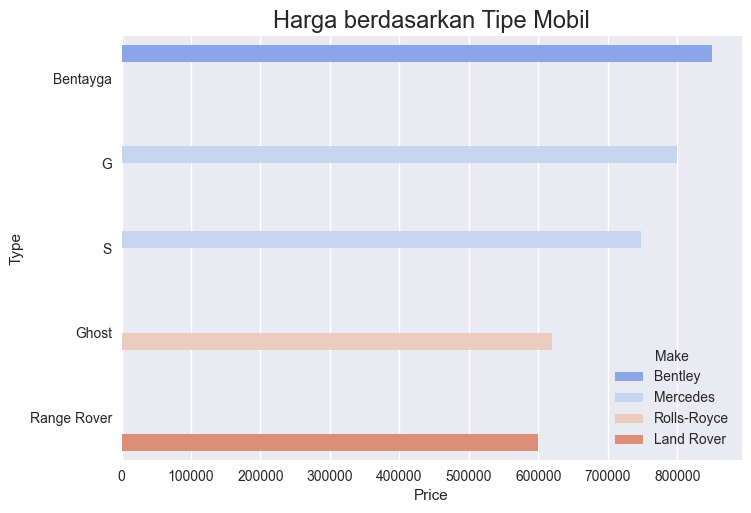

In [99]:
sns.barplot(
    x='Price',
    y='Type',
    hue='Make',
    data=df.nlargest(5, 'Price'),
    palette='coolwarm'
)
plt.title ('Harga berdasarkan Tipe Mobil', size = 17)
plt.show()

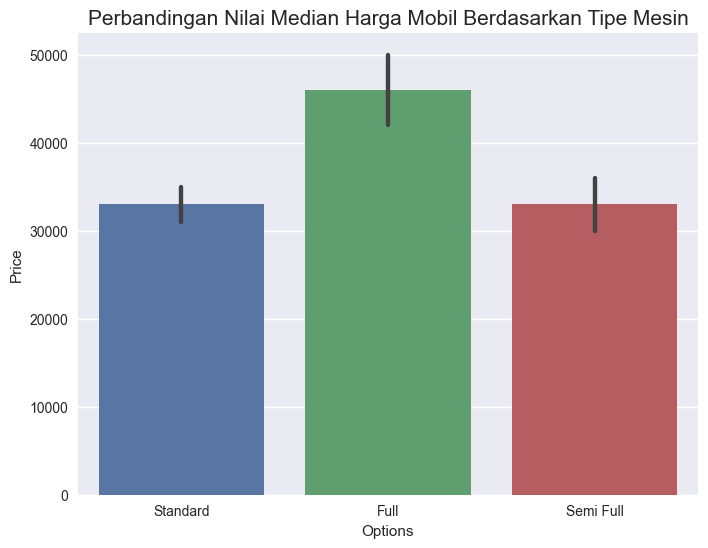

In [15]:
plt.figure(figsize=(8,6))
sns.barplot(x='Options', y='Price', data=df, estimator=np.median)
plt.title('Perbandingan Nilai Median Harga Mobil Berdasarkan Tipe Mesin', size=15)
plt.show()

<Figure size 2500x800 with 0 Axes>

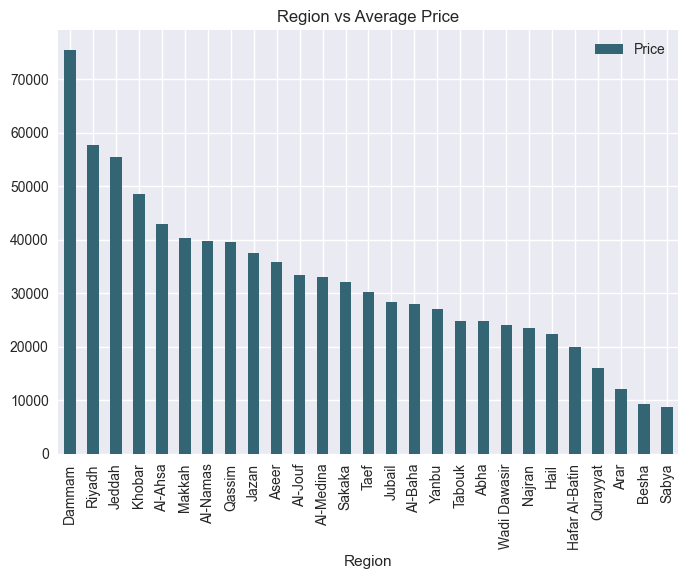

In [16]:
plt.figure(figsize=(25,8))

fig = pd.DataFrame(df.groupby(['Region'])['Price'].mean().sort_values(ascending = False))
fig.plot.bar(color='#336574')
plt.title('Region vs Average Price')
plt.show()

**Top 10 Company of Used Cars & Top 10 Type of Used Cars**

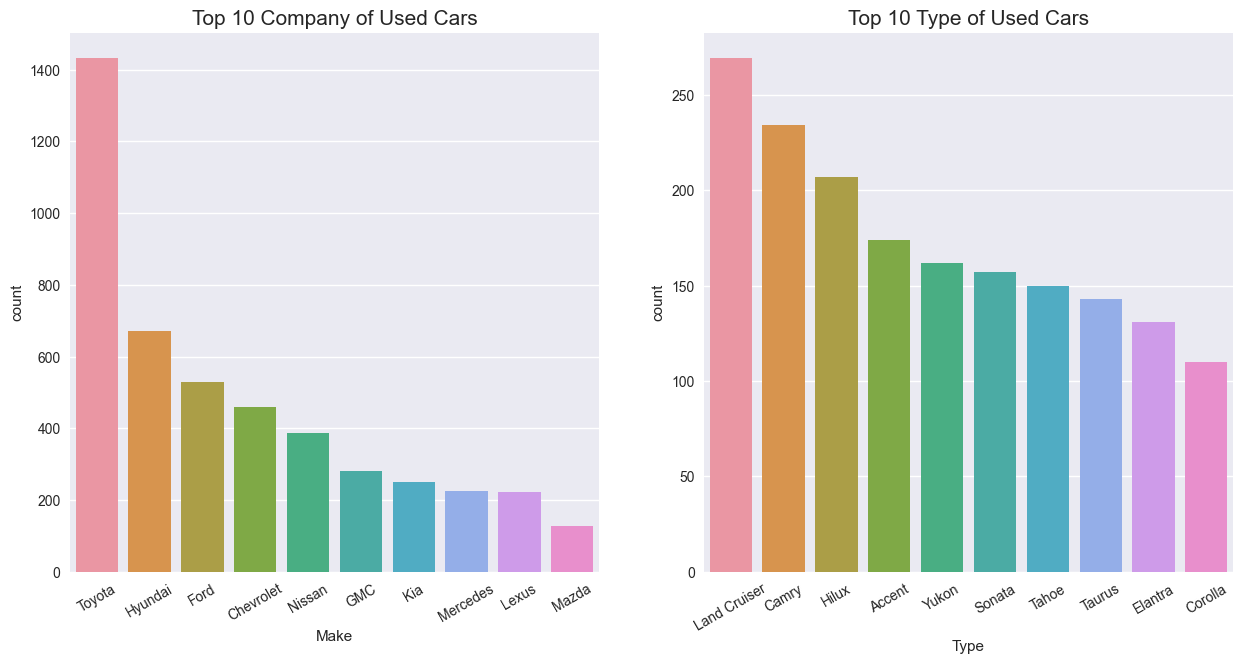

In [17]:
# Tampilkan 10 Perusahaan & Jenis mobil bekas teratas
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.countplot(x=df['Make'], order = df['Make'].value_counts().iloc[:10].index)
plt.title('Top 10 Company of Used Cars', size = 15)
plt.xticks(rotation = 30, size = 10)

plt.subplot(1,2,2)
sns.countplot(x=df['Type'], order = df['Type'].value_counts().iloc[:10].index)
plt.title('Top 10 Type of Used Cars', size = 15)
plt.xticks(rotation = 30, size = 10)

plt.show()

Grafik di atas menunjukkan bahwa Toyota merupakan produsen mobil bekas yang paling banyak dibandingkan dengan perusahaan lainnya. Ini berhubungan dengan 10 Tipe Mobil Bekas Teratas, mayoritas diisi dengan tipe mobil Toyota (Land Cruiser, Camry, Hilux, dan Corolla). Di sisi lain, Hyundai merupakan produsen mobil bekas kedua terbanyak dengan tipe-tipe seperti Accent, Sonata, dan Elantra. Jadi, berdasarkan grafik ini, kita dapat melihat adanya korelasi antara **Categorical Variable**; Merek dan Tipe.

**Top 10 Region of Used Cars & Origin of Used Cars**

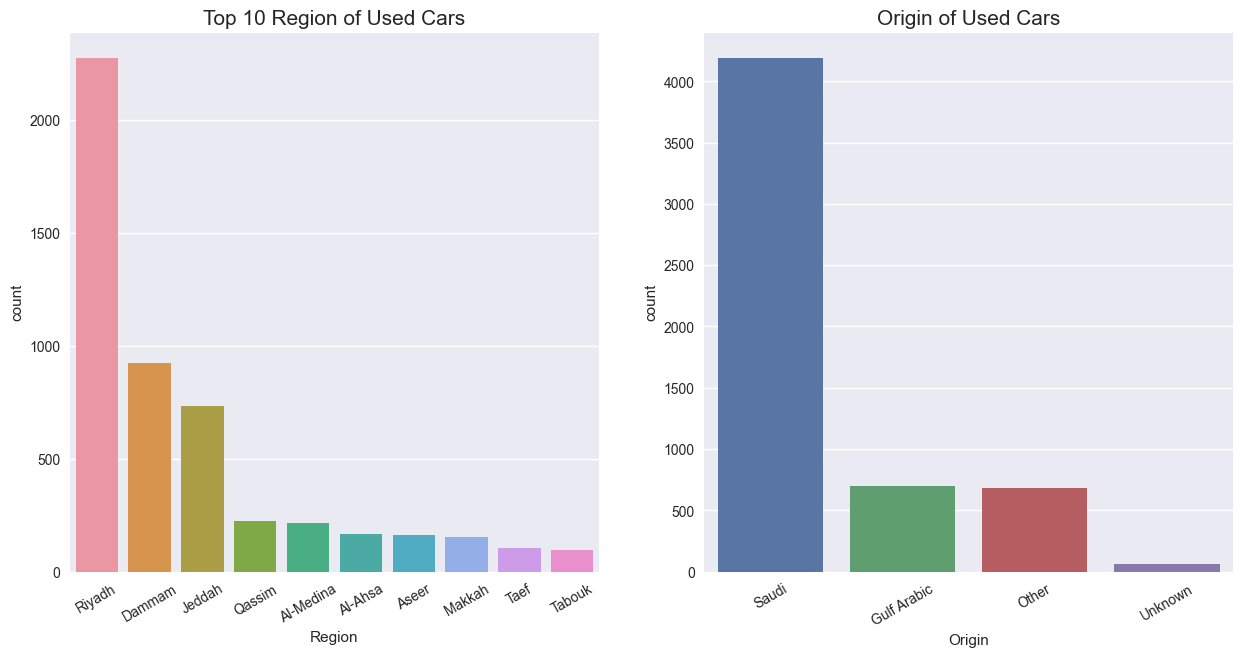

In [18]:
# Tampilkan 10 Perusahaan & Jenis mobil bekas teratas
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.countplot(x=df['Region'], order = df['Region'].value_counts().iloc[:10].index)
plt.title('Top 10 Region of Used Cars', size = 15)
plt.xticks(rotation = 30, size = 10)

plt.subplot(1,2,2)
sns.countplot(x=df['Origin'], order = df['Origin'].value_counts().index)
plt.title('Origin of Used Cars', size = 15)
plt.xticks(rotation = 30, size = 10)

plt.show()

Seperti yang dapat kita lihat, Riyadh adalah wilayah dengan jumlah mobil bekas terbanyak (lebih dari 2000 mobil), sementara Saudi adalah negara asal mobil bekas terbanyak (lebih dari 4000 mobil). Terlihat bahwa grafik ini memiliki korelasi satu sama lain. Namun, mari kita lihat dari sisi lain. Terdapat variabel `Unknown` dan `Other` dalam grafik Asal mobil bekas. Hal ini membuat data kita menjadi redudansi. 

**Type & Amount of Gear Type, Options & Negotiable on Used Cars**

In [19]:
# Periksa type & amount of Gear Type, Options & Negotiable on Used Cars
print(f"Type & Amount of Gear Type on Used Cars :\n{df['Gear_Type'].value_counts()}")
print(f"\nType & Amount of Options on Used Cars :\n{df['Options'].value_counts()}")
print(f"\nType & Amount of Negotiable on Used Cars :\n{df['Negotiable'].value_counts()}")

Type & Amount of Gear Type on Used Cars :
Automatic    4875
Manual        749
Name: Gear_Type, dtype: int64

Type & Amount of Options on Used Cars :
Full         2233
Standard     1822
Semi Full    1569
Name: Options, dtype: int64

Type & Amount of Negotiable on Used Cars :
False    3828
True     1796
Name: Negotiable, dtype: int64


Berdasarkan data di atas, dapat diketahui bahwa:
- Mobil Bekas didominasi oleh Jenis Transmisi Otomatis.
- Terdapat tiga jenis Opsi pada Mobil Bekas, yaitu Full (2233), Standar (1822), dan Semi Full (1569).
- Banyak harga Mobil Bekas yang tidak dapat dinegosiasikan.

### **Data Preprocessing**

Dataset yang digunakan membutuhkan tahapan Preprocessing yang bertujuan untuk mendapatkan data yang sudah bersih yang akan dilakukan analisa lebih lanjut. Memiliki data yang bersih pada akhirnya akan meningkatkan produktivitas secara keseluruhan dan mempermudah dalam pengambilan keputusan. Adapun beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada (drop value or imputer)
- Drop data duplicate
- Mengubah data type yang belum sesuai

### Periksa detail dataset

In [20]:
# Membuat duplikasi dataframe
cars = df.copy()

In [21]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Type,object,0,0.0,347,"[500, Logan]"
1,Region,object,0,0.0,27,"[Jubail, Besha]"
2,Make,object,0,0.0,58,"[Mazda, FAW]"
3,Gear_Type,object,0,0.0,2,"[Manual, Automatic]"
4,Origin,object,0,0.0,4,"[Saudi, Unknown]"
5,Options,object,0,0.0,3,"[Full, Semi Full]"
6,Year,int64,0,0.0,50,"[1978, 1997]"
7,Engine_Size,float64,0,0.0,71,"[4.2, 8.7]"
8,Mileage,int64,0,0.0,1716,"[167, 53800]"
9,Negotiable,bool,0,0.0,2,"[True, False]"


Table diatas menunjukkan bahwa dataset yang digunakan tidak memiliki missing value, namun apabila melihat 'unique' value pada feature `Origin` terdapat value `unknown`. Proses selanjutnya kita perlu mengobservasi terlebih dahulu untuk dapat menentukan langkah untuk mengatasinya

#### Handling Missing Value

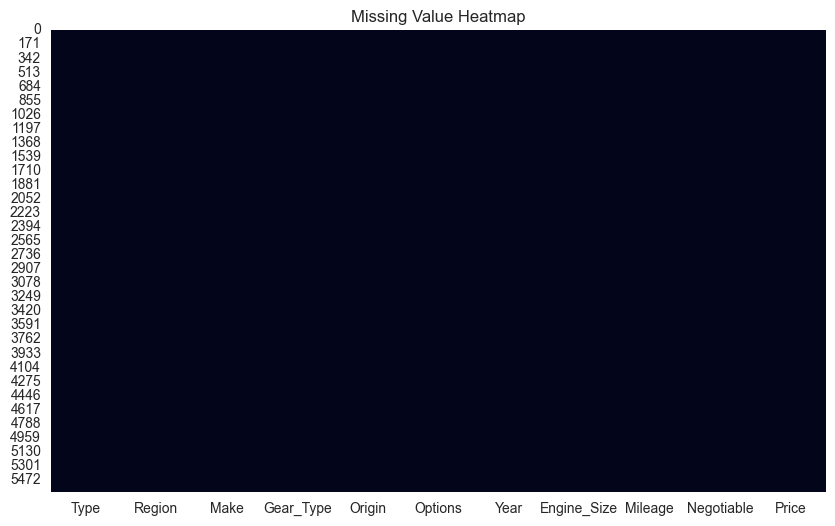

In [22]:
# Membuat missing value heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cars.isnull(), cbar=False)
plt.title('Missing Value Heatmap')
plt.show()

Dari informasi dataset di atas, dapat terlihat bahwa tidak ada missing value dalam dataset. Namun, kita tetap harus memperhatikan dalam mengambil keputusan terbaik untuk model.

Kita juga harus memeriksa adanya data duplikat dalam dataset. Duplikat berarti kita memiliki data yang berulang dalam dataset. Hal ini bisa disebabkan oleh kesalahan penginputan data atau metode pengumpulan data. Menghapus data duplikat akan membantu kita membuat observasi yang terbaik dari dataset yang kita miliki.

In [23]:
#filter kolom origin yang unknown
cars[cars.Origin == 'Unknown']

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
63,Land Cruiser Pickup,Qassim,Nissan,Manual,Unknown,Full,2016,4.8,42000,True,0
133,Land Cruiser,Riyadh,Toyota,Automatic,Unknown,Full,2014,4.6,191000,True,0
252,CX9,Abha,Mazda,Automatic,Unknown,Full,2012,2.5,377836,True,0
253,Sorento,Jubail,Kia,Automatic,Unknown,Semi Full,2015,3.3,133981,True,0
276,Charger,Riyadh,Dodge,Automatic,Unknown,Full,2020,3.6,9120,False,115000
...,...,...,...,...,...,...,...,...,...,...,...
5350,Sonata,Al-Ahsa,Hyundai,Automatic,Unknown,Semi Full,2016,2.4,258000,False,38000
5413,Camry,Riyadh,Toyota,Automatic,Unknown,Standard,2016,2.5,254000,True,0
5449,Land Cruiser,Tabouk,Toyota,Manual,Unknown,Full,1995,4.6,300000,False,20000
5481,Elantra,Al-Jouf,Hyundai,Automatic,Unknown,Standard,2016,2.0,120000,True,0


In [24]:
# cek nilai unik dari kolom 'Origin'
cars['Origin'].unique()

array(['Saudi', 'Gulf Arabic', 'Other', 'Unknown'], dtype=object)

In [25]:
# cek value unknown dari kolom 'Origin'
cars[cars.Origin == 'Unknown'].count()

Type           61
Region         61
Make           61
Gear_Type      61
Origin         61
Options        61
Year           61
Engine_Size    61
Mileage        61
Negotiable     61
Price          61
dtype: int64

In [26]:
# inconsistent data ( 'Unknown' = NaN)
cars.replace(to_replace='Unknown', value=np.nan)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


In [27]:
# remove all column with at least one missing value
cars = cars.dropna(axis=0)
cars

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


In [28]:
# Get number of missing data
cars.isnull().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

#### Dropping irrelevant columns

In [29]:
# 'Negotiable' column is not necessary for analysis, so I will delete it
cars.drop('Negotiable', axis=1, inplace=True)
cars.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,0


In [30]:
# Check Statistics Desc for numerical features
cars.describe()

,Year,Engine_Size,Mileage,Price
count,5624.0,5624.0,5624.0,5624.0
mean,2014.1,3.3,150923.4,53074.1
std,5.8,1.5,382836.0,70155.3
min,1963.0,1.0,100.0,0.0
25%,2012.0,2.0,38000.0,0.0
50%,2016.0,3.0,103000.0,36500.0
75%,2018.0,4.5,196000.0,72932.5
max,2022.0,9.0,20000000.0,850000.0


- Apabila kita melihat pada column `Price` terlihat 25% data `Price` memiliki nilai 0, yang dimana tidak mungkin harga jual mobil secara gratis
- Mileage atau jarak tempuh dalam satuan mile memiliki nilai maximum sebesar 20,000,000 atau setara 32.186.880 km apabila dibandingkan jarak tersebut melebihi jarak antara bumi ke bulan atau dapat dikatakan tidak mungkin

**Data Correlation**

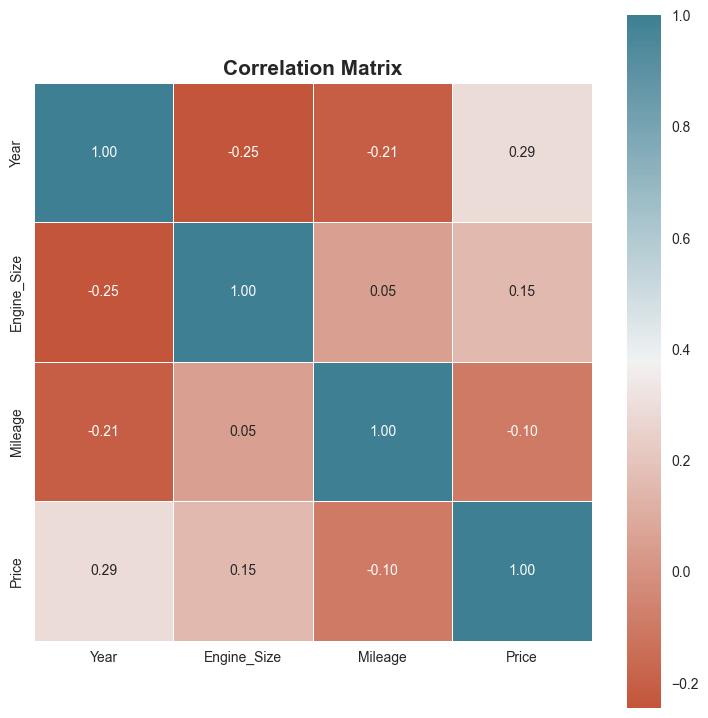

In [31]:
# Correlation matrix
plt.figure(figsize=(9, 9))
palette=sns.diverging_palette(20, 220, n=256)
corr = cars.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

Berdasarkan matriks korelasi, kita dapat menyimpulkan bahwa tidak ada fitur yang memiliki korelasi yang signifikan dengan fitur Price. Korelasi tertinggi terjadi antara fitur Year dengan Price. Secara umum, nilai korelasi cenderung positif, namun pada fitur Mileage, korelasinya memiliki arah yang berlawanan.

**Outliers**

Banyaknya outliers pada data tentu akan memengaruhi hasil analisis dan pemodelan yang dilakukan. Ada beberapa hal yang harus dipertimbangkan sebelum memutuskan treatment yang sesuai dengan data, di antaranya adalah dengan mempertimbangkan sisi domain knowledge.

<Figure size 800x600 with 0 Axes>

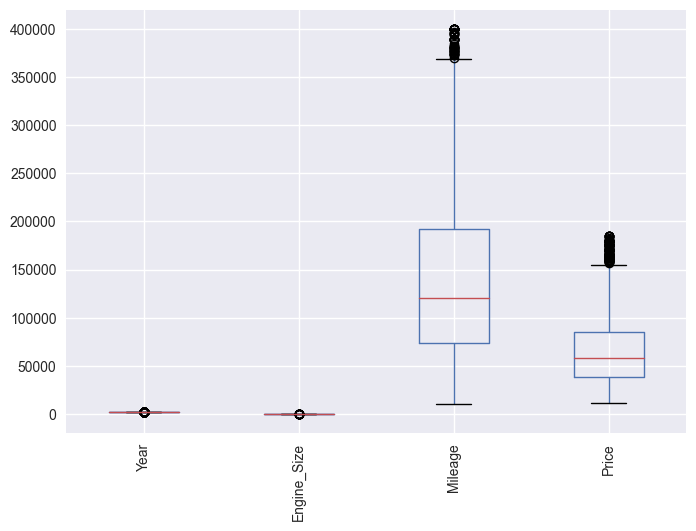

<Figure size 800x600 with 0 Axes>

In [52]:
# Check outliers using Plot boxplot
cars.boxplot(rot=90)
plt.figure(figsize = (8,6))

Dalam visualisasi di atas, terlihat adanya pencilan (outliers) pada fitur `Mileage` dan `Price`. Untuk mengatasi outliers tersebut, akan dilakukan pengolahan data pada beberapa fitur dengan mempertimbangkan metode IQR dan pengetahuan domain. Dengan demikian, model yang dihasilkan akan memprediksi nilai dengan memperhatikan batasan rentang yang telah ditentukan dalam `clean dataset` ini. Oleh karena itu, hasil prediksi model akan cenderung bias jika nilai yang diprediksi berada di luar batas nilai yang telah ditentukan tersebut.

In [53]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')  

***Price***

In [54]:
# Outliers pada fitur price
find_anomalies(cars['Price'])

IQR: 47000.0
limit_bawah: -32500.0
limit_atas: 155500.0


In [55]:
cars['Price'].describe()

count     2951.0
mean     66967.1
std      38411.5
min      11000.0
25%      38000.0
50%      58000.0
75%      85000.0
max     185000.0
Name: Price, dtype: float64

In [56]:
# Cek price > 182331.25
cars[cars['Price'] > 182331.25].count()['Price']

7

In [57]:
# Cek price > 10000
cars[cars['Price'] < 10000].count()['Price']

0

- Kita dapat melihat bahwa harga untuk sebuah mobil tidak terlihat normal
- Dengan demikian untuk mengurangi 'skew the results' kita akan melakukan drop dengan limitasi

                            10000 Riyal > Price <= 185000 Riyal

Text(0.5, 0, 'Range Selected Price')

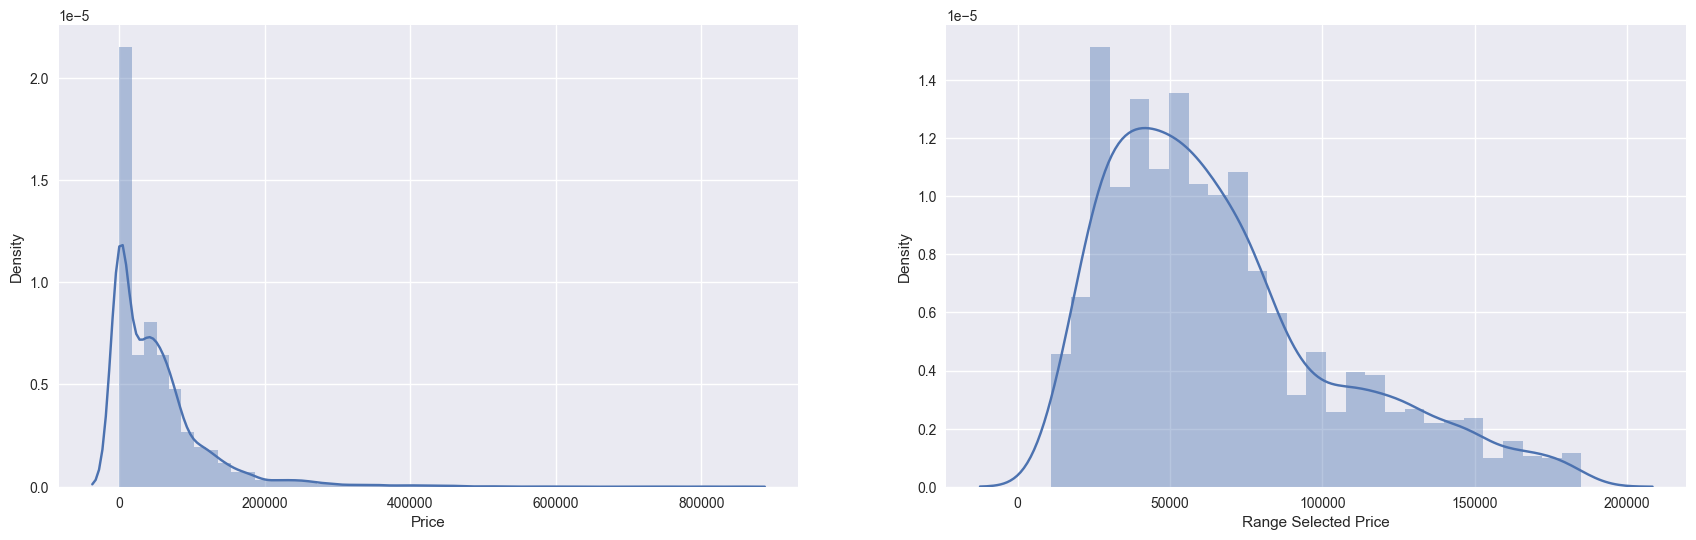

In [58]:
# Melakukan filtering pada data
cars = cars[(cars['Price'] > 10000) & (cars['Price'] <= 185000)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Price'], ax=axes[0])
sns.distplot(cars['Price'], ax=axes[1])
axes[0].set_xlabel('Price')
axes[1].set_xlabel('Range Selected Price')

***Mileage***

In [59]:
# Outliers pada fitur Mileage
find_anomalies(cars['Mileage'])

IQR: 118000.0
limit_bawah: -103000.0
limit_atas: 369000.0


In [60]:
cars['Mileage'].describe()

count     2951.0
mean    139417.4
std      88783.1
min      10000.0
25%      74000.0
50%     120000.0
75%     192000.0
max     400000.0
Name: Mileage, dtype: float64

In [61]:
# Cek Mileage > 392500.0
cars[cars['Mileage'] > 400000.0].count()['Mileage']

0

In [62]:
# Cek Mileage < 10000.0
cars[cars['Mileage'] < 10000.0].count()['Mileage']

0

- Berdasarkan beberapa `used car website` mobil yang dijual memiliki range mileage dengan kisaran 10000 - 400000
- Hal tersebut untuk membuat mileage terlihat lebih real

Text(0.5, 0, 'Range Selected Mileage')

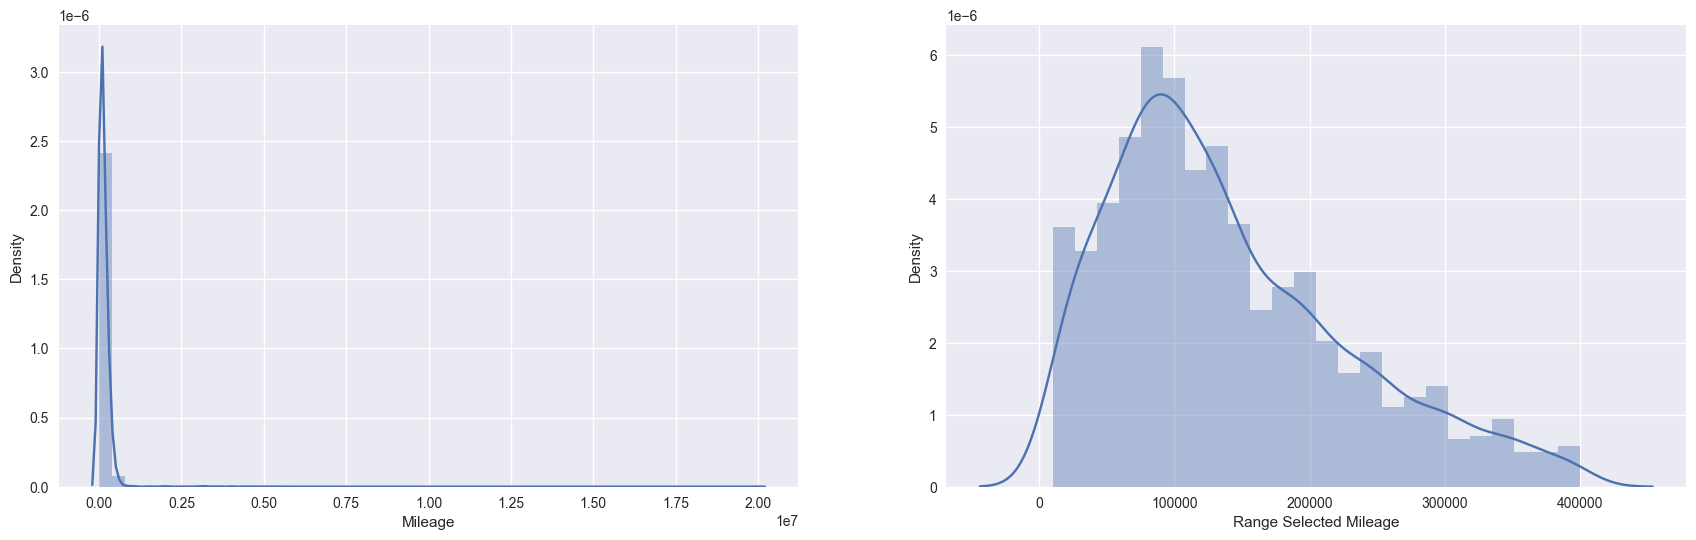

In [63]:
# Melakukan filtering pada data
cars = cars[(cars['Mileage'] >= 10000) & (cars['Mileage'] <= 400000)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Mileage'], ax=axes[0])
sns.distplot(cars['Mileage'], ax=axes[1])
axes[0].set_xlabel('Mileage')
axes[1].set_xlabel('Range Selected Mileage')

***Year***

In [64]:
cars['Year'].describe()

count   2951.0
mean    2015.4
std        3.5
min     2000.0
25%     2014.0
50%     2016.0
75%     2018.0
max     2021.0
Name: Year, dtype: float64

In [65]:
find_anomalies(cars['Year'])

IQR: 4.0
limit_bawah: 2008.0
limit_atas: 2024.0


In [66]:
# Asumsi penjualan mobil bekas biasa, tidak ada classic car
cars[cars['Year'] < 2000].count()['Year']

0

In [67]:
cars[cars['Year'] > 2021].count()['Year']

0

- Jika kita melihat nilai maksimum, terlihat bahwa tahunnya adalah 2021, namun terdapat anomali dengan tahun 2024.
- Mengingat peraturan pemerintah Saudi Arabia, mobil bekas yang diperbolehkan adalah yang berusia kurang dari 7 tahun, namun hal ini dapat mengakibatkan kehilangan banyak data.
- Selain itu, kita berasumsi bahwa mobil yang dijual adalah mobil biasa, bukan mobil klasik.
- Dengan mempertimbangkan ketiga hal tersebut, kita membatasi tahun mobil dengan rentang 2000 hingga 2021.

Text(0.5, 0, 'Range Selected Year')

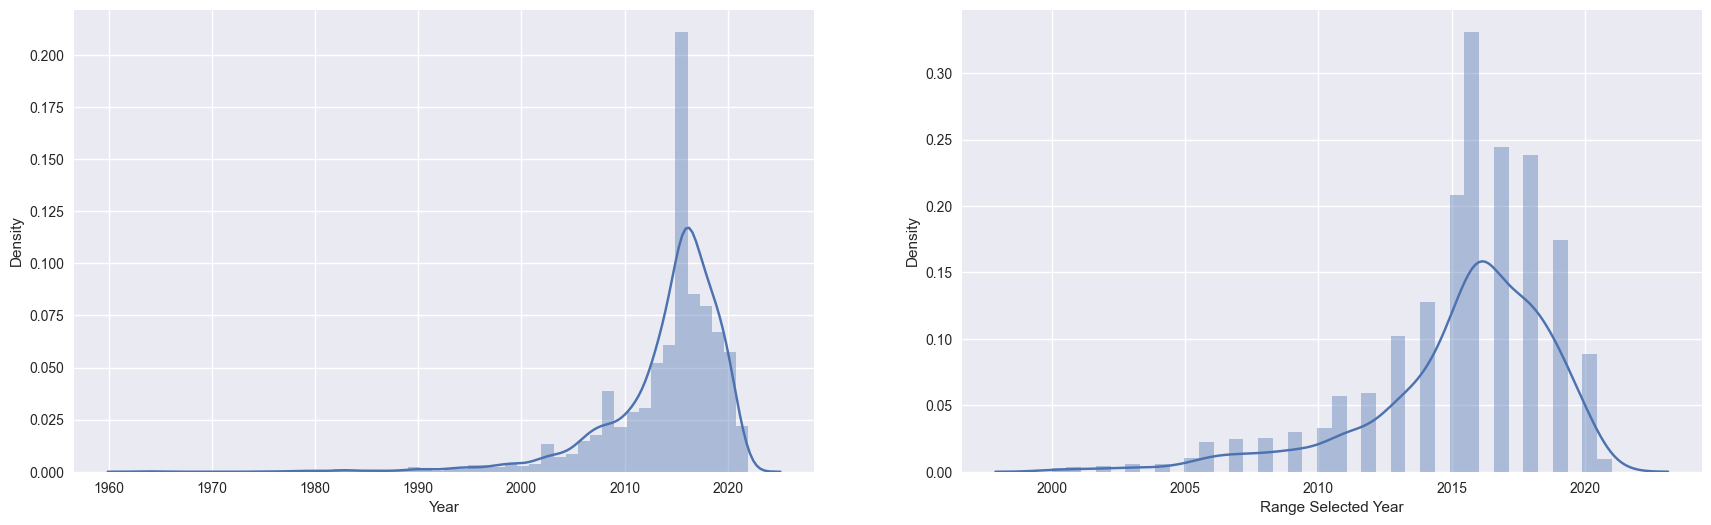

In [68]:
# Melakukan filtering pada data
cars = cars[(cars['Year'] >= 2000) & (cars['Year'] <= 2021)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Year'], ax=axes[0])
sns.distplot(cars['Year'], ax=axes[1])
axes[0].set_xlabel('Year')
axes[1].set_xlabel('Range Selected Year')

Sebelum memulai proses pemodelan, penting untuk memastikan bahwa data yang digunakan sudah bersih. Langkah selanjutnya adalah memilih metode yang diharapkan dapat meningkatkan kinerja model machine learning yang akan dibangun. Perlu diingat bahwa *Garbage in, garbage out*, yang berarti hasil yang diperoleh dari model akan bergantung pada kualitas data yang digunakan sebagai masukan.

In [69]:
cars.describe()

,Year,Engine_Size,Mileage,Price
count,2951.0,2951.0,2951.0,2951.0
mean,2015.4,3.1,139417.4,66967.1
std,3.5,1.4,88783.1,38411.5
min,2000.0,1.0,10000.0,11000.0
25%,2014.0,2.0,74000.0,38000.0
50%,2016.0,2.7,120000.0,58000.0
75%,2018.0,3.8,192000.0,85000.0
max,2021.0,9.0,400000.0,185000.0


In [70]:
cars.shape

(2951, 10)

Proses Feature Engineering telah mengeliminasi sebanyak 50% data sesuai dengan asumsi dan argumen yang diberikan. Jadi tersisa 2951 baris data dan 10 column yang akan digunakan dalam membangun model

### **Modeling**

Pada tahapan ini akan dilakukan proses:
1. Scalling,  transformasi terhadap data numerik agar antar variabel memiliki skala yang sama
2. Encoding, agar variable kategorik pada dapat direpresentasikan dalam machine learning
3. Modelling

In [74]:
# Import library untuk modeling
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


**Encoding**

Berdasarkan data yang tersedia, terdapat 6 variabel kategorikal. Jika kita ingin menggunakan seluruh fitur tersebut, kita perlu melakukan encoding. Pemilihan metode encoding dapat didasarkan pada skala pengukuran data, apakah nominal (numerik) atau ordinal (memiliki urutan tertentu saat diurutkan). Pada tahap ini, kita akan melakukan encoding sebagai berikut:

1. One-Hot Encoding: untuk variabel Gear_Type, Origin, dan Options.
2. Binary Encoding: untuk variabel Type, Region, dan Make.

Kita dapat menggunakan ColumnTransformer untuk mengubah tipe data variabel-variabel tersebut, sehingga nantinya dapat diaplikasikan dalam pipeline model.

In [76]:
# Mengubah fitur kategorikal menjadi numerikal
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['Gear_Type', 'Origin', 'Options']),
    ('Binary', ce.BinaryEncoder(), ['Type', 'Region', 'Make'])
], remainder='passthrough')

In [77]:
# Memisahkan data independen variabel dengan target
X = cars.drop(['Price'], axis=1)
y = cars['Price']

**Train and Test Splitting**

In [78]:
# Splitting data into training and test with propotion 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=42)

**Choose a Benchmark Model**

In [79]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan nilai MAE
for i in models:
    
    crossval = KFold(n_splits=10, shuffle=True, random_state=42)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-28137.4486664  -27573.39986119 -24976.74087837 -20761.66173171
 -23790.45396604 -21745.97237843 -27951.17511084 -25733.32660422
 -24995.17885206 -24688.25794488] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-18580.50587784 -18705.9263544  -17026.17323069 -14753.76517744
 -16638.69563404 -14923.40948336 -19766.97931281 -17074.60682605
 -17073.28212056 -17839.86993669] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.27548658 -0.28299679 -0.27255661 -0.29672031 -0.27607894 -0.25145442
 -0.32843648 -0.28420508 -0.28938068 -0.30326013] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-28565.58773439 -26044.64709011 -21540.73257332 -19132.61749276
 -21854.65217319 -19714.710114   -25558.35854912 -22633.73336451
 -22447.72729741 -23960

In [81]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-25035.4,2362.5,-17238.3,1506.7,-0.3,0.0
1,KNN Regressor,-23145.3,2777.3,-16096.9,1745.0,-0.3,0.0
2,DecisionTree Regressor,-25785.8,1820.7,-16229.3,1332.4,-0.3,0.0
3,RandomForest Regressor,-18308.1,2631.7,-11652.1,1183.7,-0.2,0.0
4,XGBoost Regressor,-16904.7,2444.7,-10879.5,1140.7,-0.2,0.0


- Hasil Evaluasi dari kelima model diatas menunjukkan nilai RMSE dan MAE memiliki perbedaan yang cukup signifikan. Hal tersebut dikarenakan RMSE menghitung nilai residual yang dikuadratkan terlebih dahulu sehingga memberikan 'weight' yang lebih tinggi untuk nilai error yang besar
- Dalam pemilihan kandidat model yang akan digunakan kita dapat melihat pada nilai RMSE, MAE dan MAPE paling rendah
- Dengan demikian RandomForest Regressor dan XGBoost Regressor akan dilakukan benchmark  serta akan dilakukan prediksi menggunakan test set untuk kedua model tersebut

In [85]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,16844.4,11354.2,0.2
RandomForest,18618.2,12209.0,0.2


Tabel diatas menunjukkan bahwa prediksi menggunakan XGBoost memiliki peforma yang lebih baik dengan memiliki nilai yang lebih rendah dibangin RandomForest

**Hyperparameter Tuning**

Karena model XGBoost memiliki performa yang sedikit lebih baik dari RandomForest, maka selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

In [86]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate (Penyusutan ukuran langkah digunakan dalam pembaruan untuk mencegah overfitting)
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [87]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=42, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 42
)

In [88]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Gear_Type',
                                                                                'Origin',
                                                                                'Options']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Type',
                                                                                'Region',
                                                                                'Make'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(bas...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=42, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [89]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
26,0.5,0.0,0.0,0.0,0.4,1.3,100,7,0.1,1,...,917.2,2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,0.0,2
39,0.9,0.0,0.0,0.0,0.6,0.1,141,10,0.0,10,...,738.6,1,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,0.0,1
18,0.7,0.1,0.0,0.0,0.2,0.1,193,8,0.1,4,...,879.5,3,-0.2,-0.3,-0.2,-0.2,-0.2,-0.2,0.0,4
9,0.3,0.0,0.0,0.0,0.9,0.1,105,5,0.4,3,...,513.2,4,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,0.0,5
29,0.4,0.0,0.0,0.0,0.9,10.0,138,6,0.1,6,...,692.8,5,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,0.0,6


In [90]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -17617.557652600008
Best_params: {'model__subsample': 0.4, 'model__reg_alpha': 1.2915496650148828, 'model__n_estimators': 100, 'model__max_depth': 7, 'model__learning_rate': 0.06, 'model__gamma': 1, 'model__colsample_bytree': 0.7}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [91]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=42)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,17254.5,11425.3,0.2


In [92]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,16844.4,11354.2,0.2


Setelah dilakukannya hyperparameter tuning, terjadi penurunan nilai MAPE namun sebaliknya untuk nilai RMSE & MAE walaupun cenderung kecil.

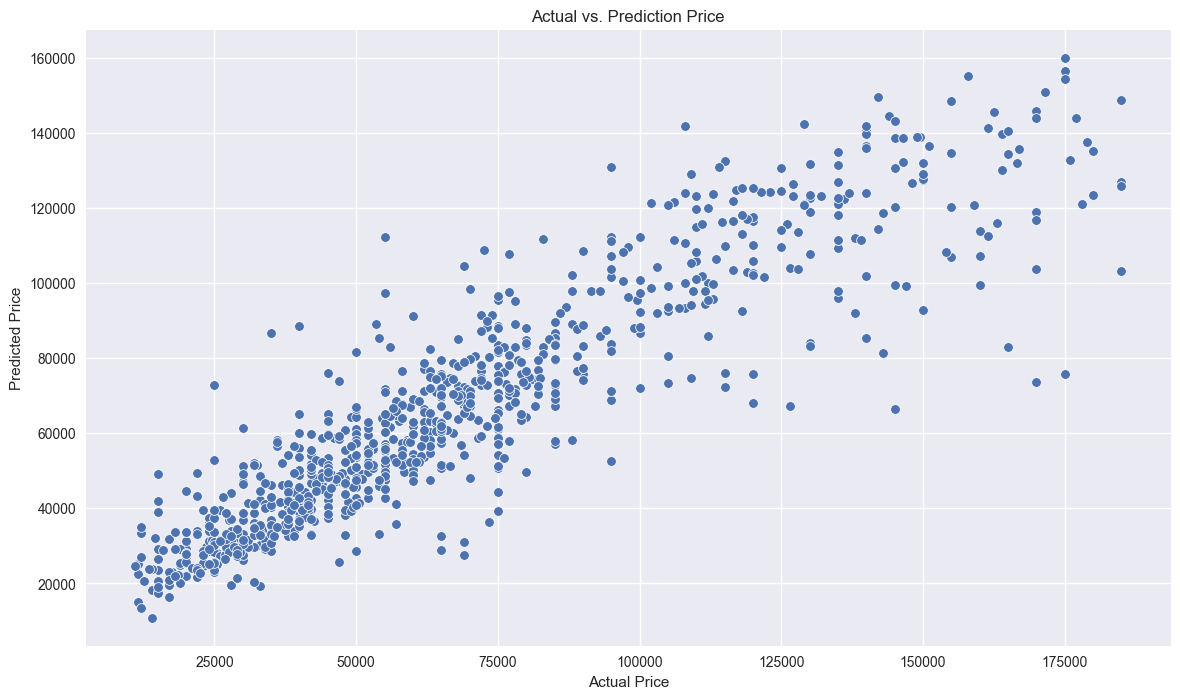

In [93]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

Berdasarkan scatter plot menunjukkan bahwa hasil prediksi model tergolong baik. Nilai akhir dari evaluation metrix (MAPE) yang diperoleh sebesar 0.193763 atau 19%. Berdasarkan Gilliad, Michael(2010) menyatakan bahwa nilai MAPE 10%-19% tergolong "Good" atau dapat dikatakan acceptable level of forecast

Kemudian, pada hasil yang diperoleh menggambarkan adanya bias pada data. Hal ini dapat disebabkan oleh beberapa faktor, salah satunya multikolineritas atau terdapat hubungan yang kuat diantara independet variablenya. Untuk mencari penyebab dan mengatasinya akan dilakukan beberapa tahapan kembali hingga kita mendapatkan hasil model yang terbaik.

In [94]:
cars.describe()

,Year,Engine_Size,Mileage,Price
count,2951.0,2951.0,2951.0,2951.0
mean,2015.4,3.1,139417.4,66967.1
std,3.5,1.4,88783.1,38411.5
min,2000.0,1.0,10000.0,11000.0
25%,2014.0,2.0,74000.0,38000.0
50%,2016.0,2.7,120000.0,58000.0
75%,2018.0,3.8,192000.0,85000.0
max,2021.0,9.0,400000.0,185000.0


**Limitasi**

Limitasi pada model yang digunakan ditunjukkan pada nilai min dan max dari terget variable yaitu 'Price'. Model dapat digunakan dalam rentang 11000 hingga 185000 SAR

-------------------------------------------------------------------------------------------

**Feature Importances**

Untuk melakukan seleksi terhadap fitur-fitur yang memang penting atau berpengaruh terhadap target variabel

<Axes: title={'center': 'Feature Importances'}>

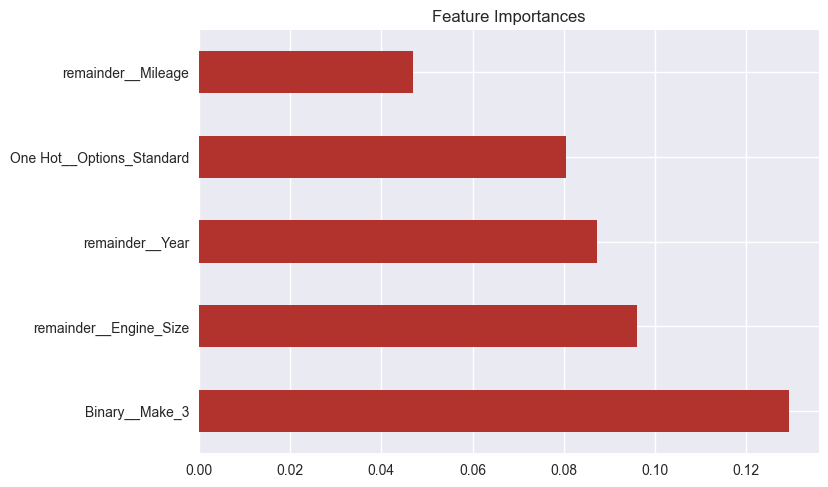

In [98]:
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending=False).head()
feature_imp.plot(kind='barh', title='Feature Importances', color='#b2322e')

In [ ]:
name = []
importance = []
for nam,imp in zip(transformer.get_feature_names(), xgb_tuning['model'].feature_importances_):
    name.append(nam)
    importance.append(round(imp*100,2))

In [ ]:
feature = pd.DataFrame({'Features':name,'Importance(%)':importance})
feature.sort_values(by='Importance(%)',ascending=False)

,Features,Importance(%)
22,Binary__Make_3,12.24
26,Engine_Size,9.93
25,Year,9.73
5,One Hot__x2_Standard,5.92
27,Mileage,4.44
23,Binary__Make_4,3.88
19,Binary__Make_0,3.64
11,Binary__Type_5,3.63
24,Binary__Make_5,3.42
20,Binary__Make_1,3.38


**Diagnostics and Collinearity**

In [ ]:
# Import Library
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X_preprocess = transformer.fit_transform(X)

In [ ]:
X_preprocess

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 2.0140e+03, 8.0000e+00,
        8.0000e+04],
       [0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 2.0150e+03, 2.4000e+00,
        2.2000e+05],
       [0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 2.0190e+03, 2.0000e+00,
        2.5000e+04],
       ...,
       [0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 2.0180e+03, 2.5000e+00,
        7.8794e+04],
       [0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 2.0160e+03, 5.3000e+00,
        4.8000e+04],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.0160e+03, 2.5000e+00,
        8.1000e+04]])

In [ ]:
X_preprocess.shape

(2951, 29)

In [ ]:
transformer.transformers_

[('One Hot', OneHotEncoder(drop='first'), ['Gear_Type', 'Origin', 'Options']),
 ('Binary', BinaryEncoder(), ['Type', 'Region', 'Make']),
 ('remainder', 'passthrough', [6, 7, 8])]

In [ ]:
feature_corr = list(transformer.transformers_[0][1].get_feature_names_out())+transformer.transformers_[1][1].get_feature_names()+['Year',
       'Engine_Size', 'Mileage']
feature_corr

['Gear_Type_Manual',
 'Origin_Other',
 'Origin_Saudi',
 'Origin_Unknown',
 'Options_Semi Full',
 'Options_Standard',
 'Type_0',
 'Type_1',
 'Type_2',
 'Type_3',
 'Type_4',
 'Type_5',
 'Type_6',
 'Type_7',
 'Type_8',
 'Region_0',
 'Region_1',
 'Region_2',
 'Region_3',
 'Region_4',
 'Make_0',
 'Make_1',
 'Make_2',
 'Make_3',
 'Make_4',
 'Make_5',
 'Year',
 'Engine_Size',
 'Mileage']

In [ ]:
df_feature = pd.DataFrame(data = X_preprocess, columns = feature_corr)
df_feature

,Gear_Type_Manual,Origin_Other,Origin_Saudi,Origin_Unknown,Options_Semi Full,Options_Standard,Type_0,Type_1,Type_2,Type_3,...,Region_4,Make_0,Make_1,Make_2,Make_3,Make_4,Make_5,Year,Engine_Size,Mileage
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2014.0,8.0,80000.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2015.0,2.4,220000.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2019.0,2.0,25000.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2012.0,4.8,189000.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2016.0,3.5,110864.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2017.0,2.5,106000.0
2947,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,5.3,86000.0
2948,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2018.0,2.5,78794.0
2949,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2016.0,5.3,48000.0


In [ ]:
df_preprocess = pd.concat((df_feature, y), axis = 1)

**Assumption Summary**

In [ ]:
import statsmodels.api as sm
from statsmodels.api import OLS

In [ ]:
y = list(y)

In [ ]:
sm_lm = sm.OLS(y, sm.add_constant(df_feature))
result = sm_lm.fit()

In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     122.1
Date:                Thu, 02 Jun 2022   Prob (F-statistic):               0.00
Time:                        23:04:05   Log-Likelihood:                -34166.
No. Observations:                2951   AIC:                         6.839e+04
Df Residuals:                    2921   BIC:                         6.857e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.012e+07   3.79e+0

**Summary**
1. Adj. R-Square : 0.0543 --> Variasi nilai Price sebesar 54,3%, sisanya terdapat pada variable lain yang tidak dapat terdapat dalam model
2. Prob(F-Statistic) : 0.00 --> Tolak H0, terdapat minimal salah satu independent variable yang berpengaruh terhadap Price
3. Uji T Prob masing- masing beta
       - prob b0 :  0.000 (tolak H0) --> Model memerlukan intercept
       - prob Make_3 : 0.158 (terima H0) --> Make_3 tidak berpengaruh positif terhadap Price
       - prob Engine_Size : 0.000 (tolak H0) --> Engine_Size berpengaruh secara positif terhadap Price
       - prob Year :0.000 (tolak H0) --> Year berpengaruh secara positif terhadap Price
       - prob Options_Standard : 0.000 (tolak H0) --> Options_Standars berpengaruh secara negatif terhadap Price
       - prob Mileage : 0.000 (tolak H0) --> Mileage berpengaruh secara negatif terhadap Price

**Normality Assumption**

Text(0.5, 0, 'Residuals')

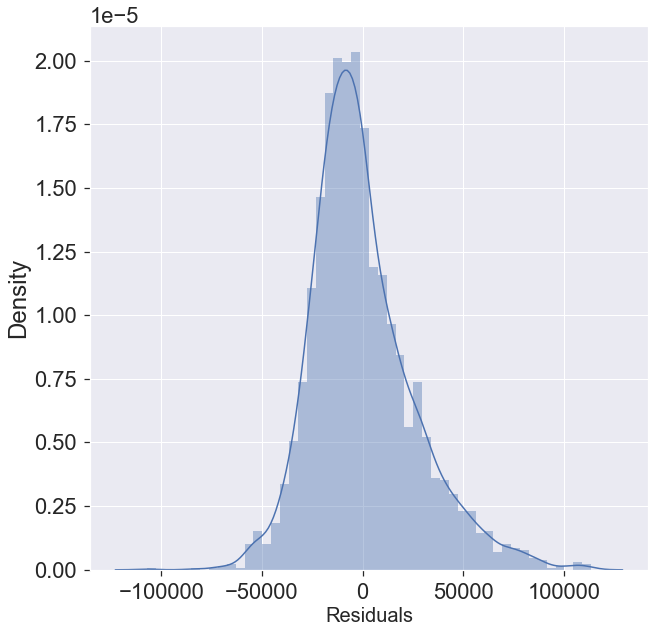

In [ ]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.distplot(result.resid)
plt.xlabel('Residuals', fontsize = 20)

**Gauss-Markov Assumption**

Text(0, 0.5, 'Residuals')

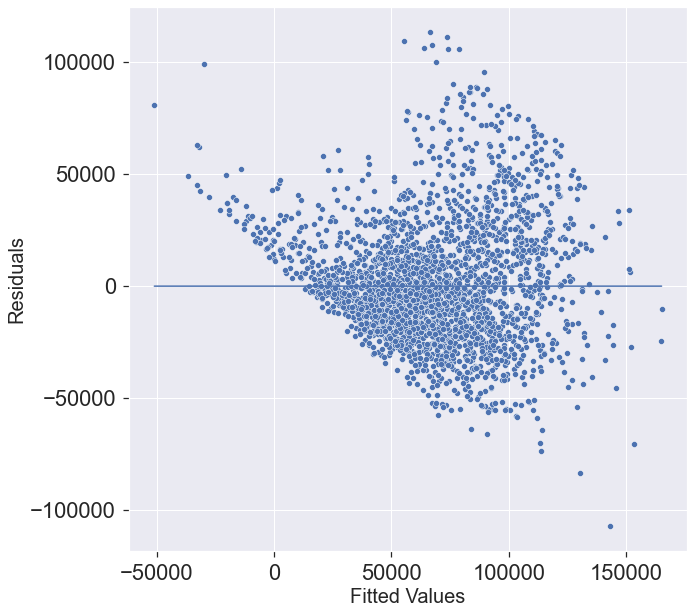

In [ ]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.scatterplot(result.fittedvalues,result.resid)
sns.lineplot(result.fittedvalues,0)
plt.xlabel('Fitted Values', fontsize = 20)
plt.ylabel('Residuals', fontsize = 20)

- Normalitas kita anggap terpenuhi (Uji F dan Uji T valid)
- Rataan error = 0, kita anggap terpenuhi karena pada gambar nilai error cenderung merata dan mendeketi 0 (Nilai beta dan nilai prediksi tidak bias)
- Error tidak saling berkolerasi (Kita anggap R-square serta p-value uji T tidak bias
- Homoscedastisitas (ragam error homogen) ada indikasi tidak terpenuhi (Hasil prediksi ketika semakin besar nilainya tidak stabil) --> Solusi penggunaan model lainnya

**Check Corellation other variable**

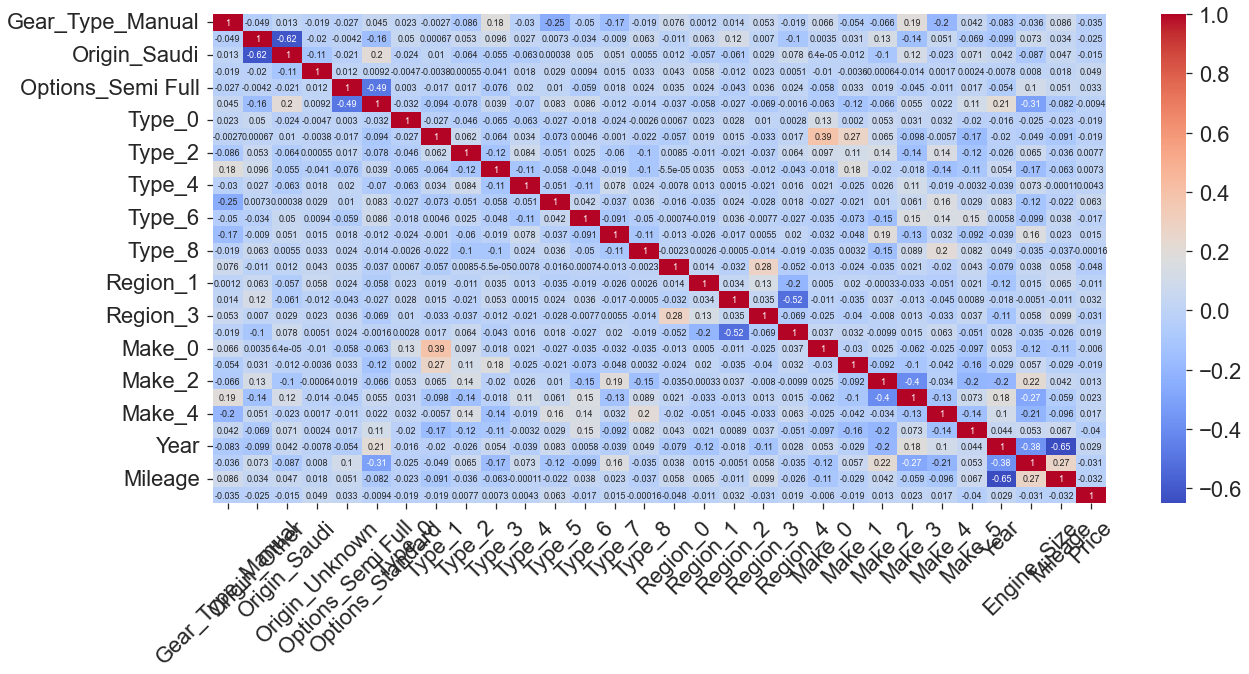

In [ ]:
# calculate correlation using spearman
df_corr = df_preprocess.corr(method = "spearman")

# rules untuk membuat heatmap menjadi tidak kotak
mask = np.triu(np.ones_like(df_corr))

# membuat heatmap
plt.figure(figsize = (20,9))
sns.heatmap(df_corr, cmap="coolwarm", annot = True, annot_kws={'size':9})

plt.xticks(rotation = 45)
plt.show()

**Multicollinearity**

In [ ]:
def calc_vif(x):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = df_feature.columns
    vif["VIF"] = [variance_inflation_factor(df_feature.values, i) for i in range(df_feature.shape[1])]

    return(vif)

In [ ]:
calc_vif(df_feature)

,variables,VIF
0,Gear_Type_Manual,1.398166
1,Origin_Other,1.925241
2,Origin_Saudi,7.953302
3,Origin_Unknown,1.046329
4,Options_Semi Full,1.907275
5,Options_Standard,2.606644
6,Type_0,1.075837
7,Type_1,1.575349
8,Type_2,1.594709
9,Type_3,2.195259


- Multikolineritas ada indikasi tidak terpenuhi (Tidak valid dalam penginterprestasi nilai beta) --> Feature Selection

### **Conclusion**

Dalam proyek ini, kita berhasil membangun sebuah model untuk memprediksi harga mobil bekas dengan rentang harga antara 11.000 hingga 185.000 SAR. Model ini dapat menjadi informasi pendukung yang berguna dalam menentukan harga jual dan beli mobil bekas bagi perusahaan maupun individu yang melakukan transaksi.

Hasil dari model menunjukkan bahwa fitur-fitur yang paling signifikan pengaruhnya adalah Make, Engine Size, dan Year. Performa model regresi dievaluasi menggunakan metrik RMSE (Root Mean Square Error), MAE (Mean Absolute Error), dan MAPE (Mean Absolute Percentage Error). Setelah melalui proses penyetelan hyperparameter pada masing-masing metrik evaluasi, diperoleh nilai akhir sebesar 17.523,864046 untuk RMSE, 11.476,471234 untuk MAE, dan 0,193763 untuk MAPE.

Nilai RMSE memiliki makna bahwa ketika model digunakan untuk memprediksi harga mobil bekas, perkiraan harga rata-ratanya dapat memiliki selisih sekitar 17.532 SAR dari harga yang seharusnya. Namun, prediksi yang dihasilkan juga dapat melesat jauh dari nilai sebenarnya karena adanya bias pada model.

Model yang diperoleh masih memiliki potensi untuk ditingkatkan melalui proses-proses tertentu. Namun, untuk saat ini, kami berasumsi bahwa model sudah mencapai hasil yang diharapkan. Selain itu, dalam proses pembuatan model, pengetahuan yang mendalam mengenai mobil sangat diperlukan untuk mempermudah pengembangan model yang lebih baik.

### **Recommendation** 

Berikut ini adalah beberapa rekomendasi yang dapat dilakukan untuk meningkatkan performa model:

1. Menambahkan fitur yang mengkategorikan jenis mobil menjadi classic atau non-classic. Hal ini penting karena harga mobil bekas terhadap mileage dan tahun pembuatan dapat berbeda secara signifikan antara mobil-mobil classic dan mobil-mobil biasa. Dengan memasukkan fitur ini ke dalam model, kemungkinan besar akan meningkatkan akurasi prediksi harga mobil bekas.

2. Melakukan analisis terhadap nilai error tertinggi yang dihasilkan oleh model, dengan mengelompokkan error menjadi 3 kategori, yaitu overestimation (5%), underestimation (5%), dan mayoritas yang memiliki error mendekati nilai mean (90%). Setelah itu, dilakukan pemeriksaan hubungan antara error tersebut dengan setiap variabel independen. Dengan demikian, dapat dilakukan proses training ulang dan menghindari variabel yang menyebabkan error tinggi.

3. Jika tersedia tambahan data yang signifikan, dapat mencoba menggunakan model yang lebih kompleks seperti recursive neural networks (RNN). Namun, perlu diperhatikan bahwa jika jumlah data dan fitur masih sebatas dataset yang ada saat ini, kemungkinan peningkatan performa model secara signifikan dengan menggunakan model yang lebih kompleks tidak terlalu besar.

#### **Save Model**

In [100]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Model_SaudiUsedCar_XGB.sav', 'wb'))